# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from scipy import stats
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load Data

In [2]:
# prepare column names
col_names=["ID", "Class"]
for i in range(1,31):
    col_names.append("attr {}".format(i))

In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data' 
data = pd.read_csv(data_url, sep=',', names=col_names)
print(data.shape)

(569, 32)


In [4]:
data.head()

,ID,Class,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,...,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# splitting the data into train and test

In [5]:
def split(data, labels):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
    for train_index, test_index in sss.split(data, labels):
        print(train_index)
        x_train, x_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
    return train_index, test_index

In [6]:
train_index, test_index = split(data.iloc[:,2:], data.iloc[:,1])

[503 169 465 498 130 161 425 404 176 505 534  25 418 398 349  56 205 372
  80  91 209 269 474 109 553 263   8 405 197 204 383 432 406 532 322 224
 280 496 174 336  98 424 172 170 500  54 337 565 378 530 478 219   9  23
  71 305  17 562 567   3 175 380 557  42 234 379 103 340 284 131 399 547
 371 395 223 489 262 375 105 328 528  57 191 515 563 317 110 270  36 513
 118 483 382 166 494 421 208 211 362 140 560  19 429 123 393  39 411 132
 299 283 178 545 531 347 433 519 344 158 320 335 323 357 338 159 437 199
 215 173  26 309 306 523 294 525 100 521 477 511 556 420 373  69 451   5
 154  63 387 189 314 241 480 293 546 514 564 157 231 358 198 497 137 558
 419 414 117 254 442 138 122 438 268 352  90 313 124 401   1 490 134  73
 316  14 127 407 472 359 365  76  87 261 533 469 363 136 243 302 151 568
 101 168  89 272  43 466 278 488 374  11  31 527  77 518 526 255 366  97
 212 422 487 273 499  86 246 319 353 240 292 111 181 225 516  21 391 251
 520  94 360 410  79 458 259  52  88 252 370 216  2

In [7]:
train_data = data.iloc[train_index]
test_data = data.iloc[test_index]

# Preprocessing

## Z-score

### Train data

In [8]:
# skip applying 'z-score' on class, Id columns
cols = train_data.columns[2:]
x = train_data[cols]# skip applying 'z-score' on constant columns
x_scaled = x.apply(lambda x: x if np.std(x) == 0 else zscore(x)) 
temp_data = pd.DataFrame(x_scaled, columns = cols)
temp_data.insert(0,'ID',train_data.iloc[:,0].values, True)
temp_data.insert(1,'Class',train_data.iloc[:,1].values, True)
train_data = temp_data
train_data.head()

,ID,Class,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,...,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
503,915143,M,2.460756,0.137315,2.404650,2.808607,-0.217697,0.436265,0.977795,1.285341,...,2.922729,-0.281466,3.052752,3.235682,-0.564187,0.669342,0.506388,1.693839,0.038080,-0.598390
169,8712853,B,0.204971,-0.531630,0.144071,0.055720,0.142656,-0.489496,-0.807709,-0.305352,...,-0.059434,-0.421973,-0.102396,-0.176661,-0.488911,-0.580740,-1.010896,-0.462228,-0.783536,-1.046627
465,9113239,B,-0.275634,0.206997,-0.234176,-0.339484,-0.960882,0.337315,0.137885,-0.546667,...,-0.195541,-0.018220,0.204559,-0.279977,-0.555331,1.940175,1.845624,0.312311,-0.064622,2.153861
498,914769,M,1.182848,-0.399234,1.158662,1.111716,0.328803,0.516187,0.744487,1.069736,...,1.289446,-0.441353,1.131329,1.207120,0.378971,0.332298,0.379834,0.778406,-0.610736,0.546225
130,866714,B,-0.567330,-1.381747,-0.549314,-0.580200,0.708122,-0.180465,-0.775802,-0.534194,...,-0.622145,-1.260164,-0.492584,-0.603139,0.445390,0.015376,-0.852486,-0.507619,0.952617,0.438522


### Test data

In [9]:
# skip applying 'z-score' on class, Id columns
cols = test_data.columns[2:]
x = test_data[cols]# skip applying 'z-score' on constant columns
x_scaled = x.apply(lambda x: x if np.std(x) == 0 else zscore(x)) 
temp_data = pd.DataFrame(x_scaled, columns = cols)
temp_data.insert(0,'ID',test_data.iloc[:,0].values, True)
temp_data.insert(1,'Class',test_data.iloc[:,1].values, True)
test_data = temp_data
test_data.head()

,ID,Class,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,...,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
311,89382601,B,0.219071,-0.869461,0.100100,0.108451,-1.456010,-1.288963,-0.887876,-0.749771,...,0.109234,-0.677525,-0.051283,-0.004535,-1.313421,-1.173202,-1.023089,-0.838624,-0.650778,-1.689643
536,91979701,M,0.116594,0.734783,0.147210,0.000500,0.573971,0.217813,0.751925,0.388004,...,-0.145736,1.403008,-0.032972,-0.215432,0.268675,0.151866,0.739054,0.349536,-0.382983,-0.004290
51,857373,B,-0.073290,-0.717455,-0.136311,-0.177880,-1.406767,-0.811301,-0.836877,-0.790882,...,-0.280848,-0.438231,-0.283830,-0.349656,-0.978994,-0.601556,-0.753381,-0.416597,-0.944077,-0.211152
285,8912521,B,-0.392778,-0.235715,-0.455273,-0.432534,-0.886410,-1.157343,-1.044728,-1.172792,...,-0.535819,-0.456510,-0.604879,-0.523247,-1.197658,-1.203509,-1.219397,-1.589812,-0.690628,-1.222617
512,915691,M,-0.145627,0.260057,-0.074507,-0.224321,1.073749,0.809258,0.729535,0.930730,...,0.098338,0.636933,0.241690,0.002213,1.100454,0.886961,1.147787,1.398137,1.030909,1.733731


### Conclusion
- The result data spread on less scale, so values are more close to each other.
- A value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number.


# Feature Projection

In [10]:
def correlation_heatmap(data):
    correlations = data.corr(method='pearson')
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [11]:
# initiate columns names for pca and feture selection
pca_columns =[] 
for i in range(1,11):
    pca_columns.append('principal component {}'.format(i))

## Train data

In [12]:
# pass desired sum of varince ratio we need to be captured 
pca = PCA(0.95)
principalComponents = pca.fit_transform(train_data.iloc[:,2:])

In [13]:
pca.n_components_

10

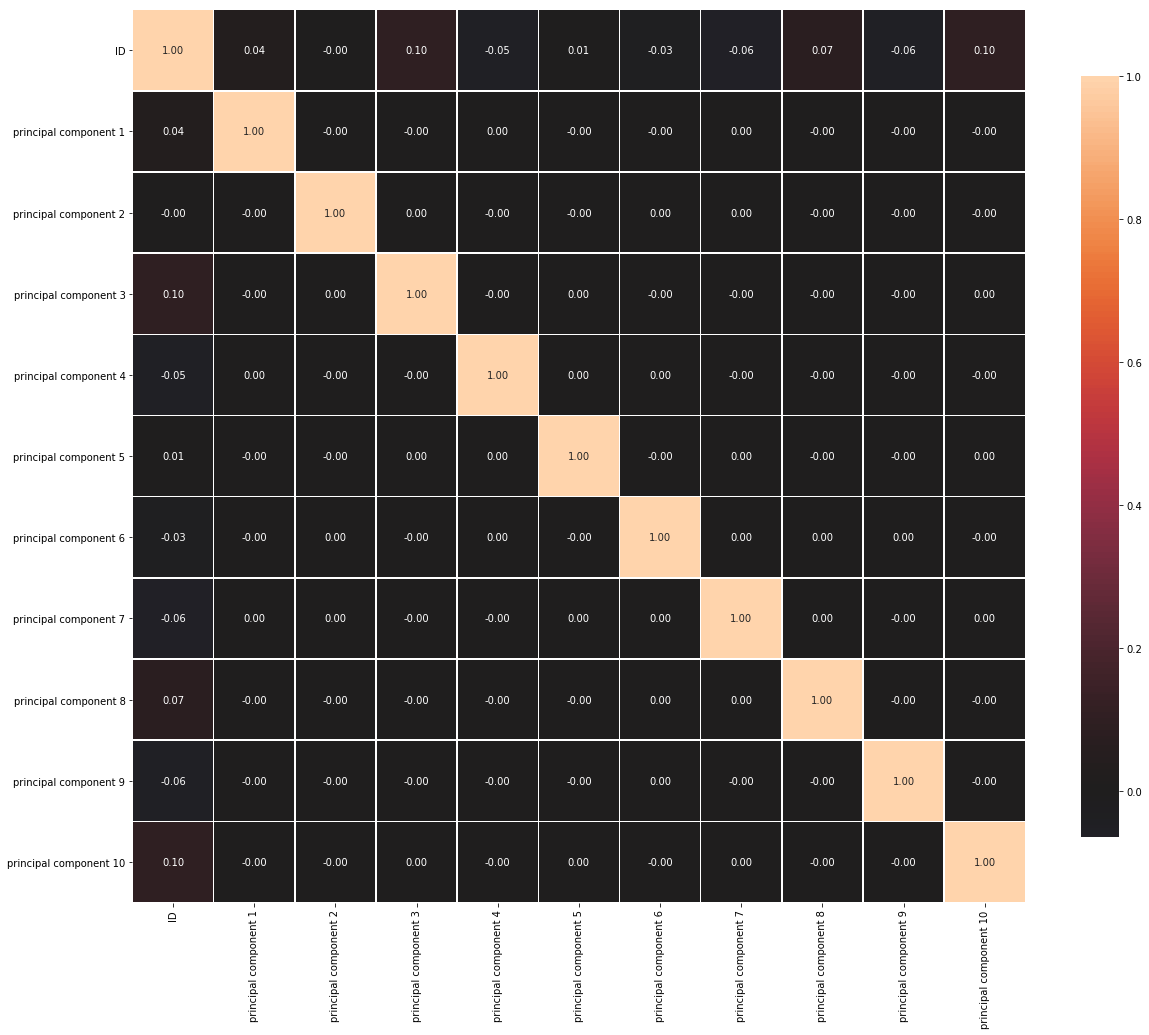

In [14]:
pca_data = pd.DataFrame(principalComponents, columns = pca_columns)
pca_data.insert(0,'ID',train_data.iloc[:,0].values, True)
pca_data.insert(1,'Class',train_data.iloc[:,1].values, True)
train_data = pca_data
correlation_heatmap(pca_data)

## Test data

In [15]:
# pass desired sum of varince ratio we need to be captured 
pca = PCA(0.95)
principalComponents = pca.fit_transform(test_data.iloc[:,2:])

In [16]:
pca.n_components_

10

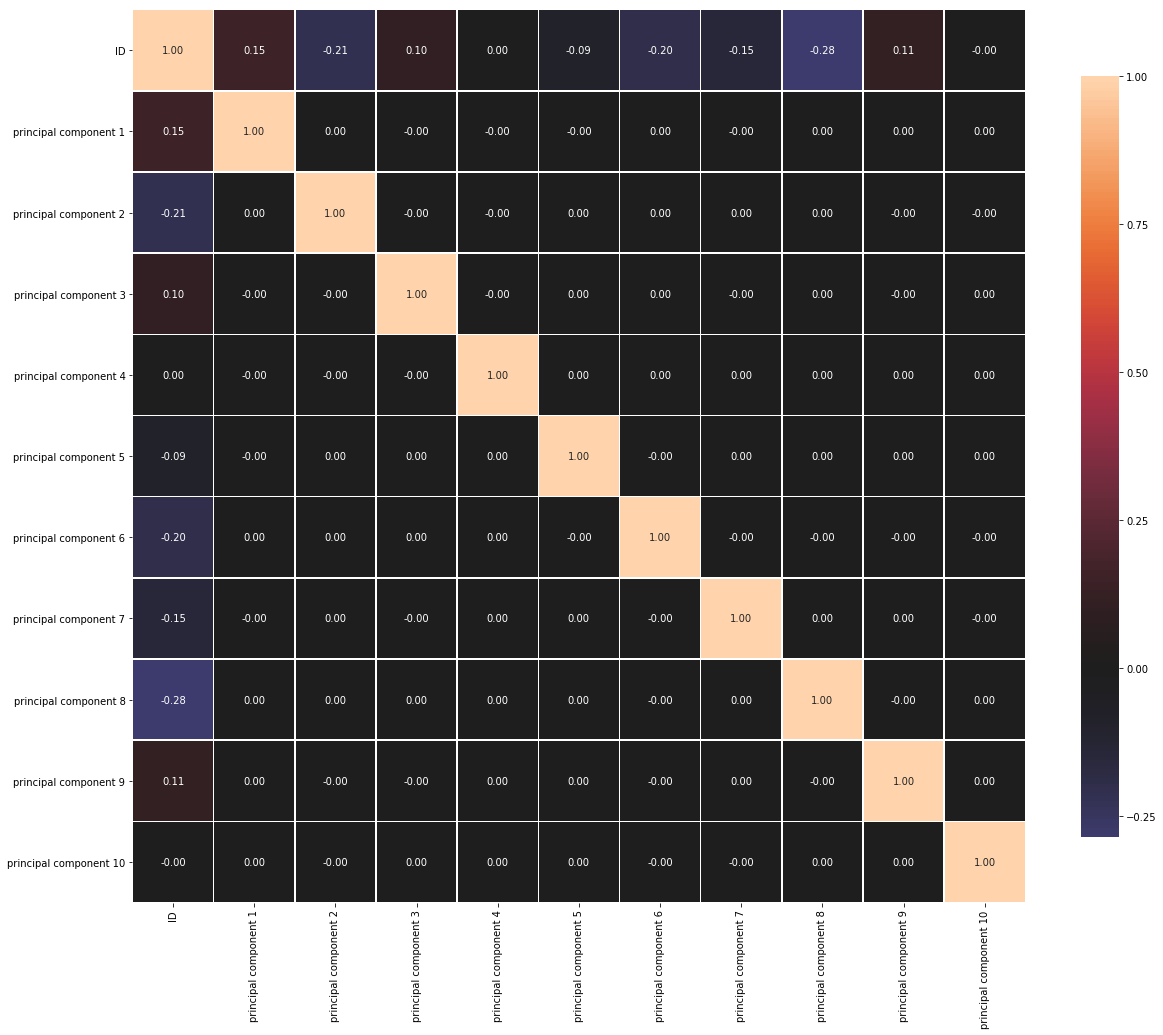

In [17]:
pca_data = pd.DataFrame(principalComponents, columns = pca_columns)
pca_data.insert(0,'ID',test_data.iloc[:,0].values, True)
pca_data.insert(1,'Class',test_data.iloc[:,1].values, True)
test_data = pca_data
correlation_heatmap(pca_data)

## Conclusion
- Principal component analysis convert a set of observations of correlated variables into a set of values of linearly uncorrelated variables called principal components
- less than half of the attributes can describe the data with 0.95 percent.


# Classification

## K-nearest Neighbours

### select best n_neighbors

In [18]:
def KNNC_param_selection(X, y):
    neighbors = [3, 5, 7, 10, 15, 20]
    KNNC = KNeighborsClassifier()
    param_grid = {'n_neighbors': neighbors}
    grid_search = GridSearchCV(KNNC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [19]:
KNNC_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

{'n_neighbors': 7}

- n_neighbors = 7 is the best 

### train the model

In [82]:
KNNC = KNeighborsClassifier(n_neighbors = 7)
KNNC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [83]:
y_pred = KNNC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [84]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [85]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9642857142857143 for "M" class , 0.9130434782608695 for "B" class
recall:  0.84375 for "M" class , 0.9813084112149533 for "B" class
fscore:  0.8999999999999999 for "M" class , 0.9459459459459459 for "B" class


### Confusion matrix

In [86]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[ 54,  10],
       [  2, 105]])

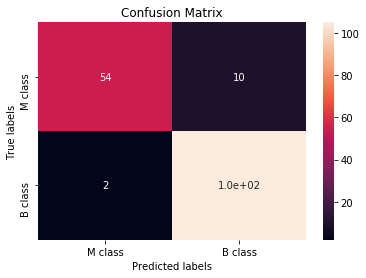

In [87]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

### For different n_neighbors  = 2

In [26]:
KNNC = KNeighborsClassifier(n_neighbors = 2)
KNNC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [27]:
y_pred = KNNC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [28]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [29]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9803921568627451 for "M" class , 0.8833333333333333 for "B" class
recall:  0.78125 for "M" class , 0.9906542056074766 for "B" class
fscore:  0.8695652173913042 for "M" class , 0.933920704845815 for "B" class


### For different n_neighbors  = 20

In [30]:
KNNC = KNeighborsClassifier(n_neighbors = 20)
KNNC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [31]:
y_pred = KNNC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [32]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [33]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9824561403508771 for "M" class , 0.9298245614035088 for "B" class
recall:  0.875 for "M" class , 0.9906542056074766 for "B" class
fscore:  0.9256198347107438 for "M" class , 0.9592760180995474 for "B" class


### less valuse for Evaluation matrices than n_neighbors equal = 7, so paramter tunning helped to get better accurcy  

## Linear SVM

### select best C 

In [34]:
def LSVC_param_selection(X, y):
    c = [0.1, 0.15 ,0.25, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5]
    LSVC = LinearSVC()
    param_grid = {'C': c}
    grid_search = GridSearchCV(LSVC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [35]:
LSVC_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

{'C': 0.1}

- C = 0.1 is the best 

### train the model

In [36]:
LSVC = LinearSVC(C = 0.1)
LSVC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [37]:
y_pred = LSVC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [38]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [39]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9365079365079365 for "M" class , 0.9537037037037037 for "B" class
recall:  0.921875 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9291338582677166 for "M" class , 0.958139534883721 for "B" class


### Confusion matrix

In [40]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[ 59,   5],
       [  4, 103]])

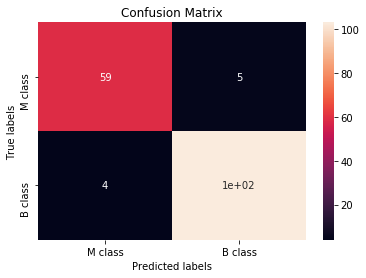

In [41]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

### For different C  = 2

In [42]:
LSVC = LinearSVC(C = 2)
LSVC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [43]:
y_pred = LSVC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [44]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [45]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9365079365079365 for "M" class , 0.9537037037037037 for "B" class
recall:  0.921875 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9291338582677166 for "M" class , 0.958139534883721 for "B" class


### For different C  = 0.01

In [46]:
LSVC = LinearSVC(C = 0.01)
LSVC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
y_pred = LSVC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [48]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [49]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9365079365079365 for "M" class , 0.9537037037037037 for "B" class
recall:  0.921875 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9291338582677166 for "M" class , 0.958139534883721 for "B" class


### less valuse for Evaluation matrices than C equal = 0.25 , so paramter tunning helped to get better accurcy  

## non Linear SVM

### select best C, gamma 

In [50]:
def SVC_param_selection(X, y):
    c = [0.1, 0.25 ,0.25, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5]
    gamma = [0.1, 0.25 ,0.25, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5]
    NLSVC = SVC()
    param_grid = {'C': c, 'gamma' : gamma}
    grid_search = GridSearchCV(NLSVC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [51]:
SVC_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

{'C': 1.2, 'gamma': 0.1}

- C = 0.1 is the best 
- gamma = 0.1 is the best 

### train the model

In [52]:
NLSVC = SVC(C = 0.1, gamma = 0.1)
NLSVC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
y_pred = NLSVC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [54]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [55]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9193548387096774 for "M" class , 0.9357798165137615 for "B" class
recall:  0.890625 for "M" class , 0.9532710280373832 for "B" class
fscore:  0.9047619047619047 for "M" class , 0.9444444444444445 for "B" class


### Confusion matrix

In [56]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[ 57,   7],
       [  5, 102]])

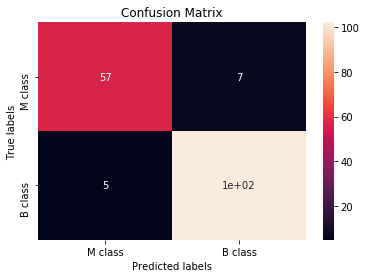

In [57]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

### For different C  = 2 , gamma = 1.0

In [58]:
NLSVC = SVC(C = 2, gamma = 1)
NLSVC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
y_pred = NLSVC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [60]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [61]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  1.0 for "M" class , 0.6294117647058823 for "B" class
recall:  0.015625 for "M" class , 1.0 for "B" class
fscore:  0.03076923076923077 for "M" class , 0.7725631768953068 for "B" class


## For different C  = 0.01, gamma = 0.01

In [62]:
NLSVC = SVC(C = 0.01, gamma = 0.01)
NLSVC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred = NLSVC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [64]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.0 for "M" class , 0.6257309941520468 for "B" class
recall:  0.0 for "M" class , 1.0 for "B" class
fscore:  0.0 for "M" class , 0.7697841726618705 for "B" class


### less valuse for Evaluation matrices than C equal = 0.7 and gamma = 0.01, so paramter tunning helped to get better accurcy  

## Logisitc Regression

### select best C 

In [66]:
def LR_param_selection(X, y):
    c = [0.1, 0.25 ,0.25, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5]
    LR = LogisticRegression()
    param_grid = {'C': c}
    grid_search = GridSearchCV(LR, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [67]:
LR_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

{'C': 0.1}

- C = 0.1 is the best 

### train the model

In [68]:
LR = LogisticRegression(C = 0.1)
LR.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
y_pred = LR.predict(test_data.iloc[:,2:])

### Evaluate model 

In [70]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [71]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9365079365079365 for "M" class , 0.9537037037037037 for "B" class
recall:  0.921875 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9291338582677166 for "M" class , 0.958139534883721 for "B" class


### Confusion matrix

In [72]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[ 59,   5],
       [  4, 103]])

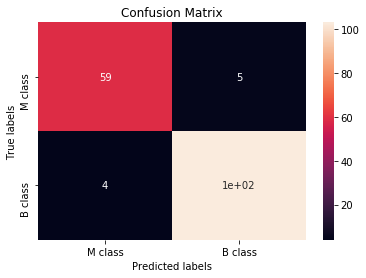

In [73]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

### For different C  = 2

In [74]:
LR = LogisticRegression(C = 2)
LR.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
y_pred = LR.predict(test_data.iloc[:,2:])

### Evaluate model 

In [76]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [77]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9365079365079365 for "M" class , 0.9537037037037037 for "B" class
recall:  0.921875 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9291338582677166 for "M" class , 0.958139534883721 for "B" class


### For different C  = 0.01

In [78]:
LR = LogisticRegression(C = 0.01)
LR.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
y_pred = LR.predict(test_data.iloc[:,2:])

### Evaluate model 

In [80]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [81]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9672131147540983 for "M" class , 0.9545454545454546 for "B" class
recall:  0.921875 for "M" class , 0.9813084112149533 for "B" class
fscore:  0.944 for "M" class , 0.967741935483871 for "B" class


### less valuse for Evaluation matrices than C equal = 0.25 , so paramter tunning helped to get better accurcy  

# Conclusion 
- All the models have very good values for the precession, recall, and F-score
- The best model is the LinerSVC classifier as the number of wrongly classified samples is = 7
- the second best one is logisitc regresssion wit number of wrong clssified samples = 8